In [23]:
import pandas as pd        
import numpy as np           


LOAD THE DATA

In [24]:
df=pd.read_csv("Startups1.csv",index_col=0)

df.head()

,Company,City,Starting Year,Founders,Industries,Description,No. of Employees,Funding Amount in $,Funding Round,No. of Investors
0,Urban Company,Gurgaon,2014,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan","Apps, Home Services, Marketplace, Service Indu...",Urban is a marketplace for independent contrac...,1001-5000,445920356,12,16
1,Classplus,Noida,2018,"Bhaswat Agarwal, Bikash Dash, Mukul Rustagi, N...","B2B, E-Learning, EdTech, Education, Mobile App...",Classplus is a mobile-first SaaS platform that...,101-250,89506451,10,20
2,Paytm,Noida,2010,"Akshay Khanna, Vijay Shekhar Sharma","E-Commerce, Finance, Financial Services, Inter...",Paytm is a payment gateway that allows users a...,501-1000,32448851,4,4
3,Apna,Mumbai,2019,Nirmit Parikh,"Employment, Human Resources, Recruiting, Staff...",Apna is a professional networking and job-sear...,101-250,93450000,4,6
4,Razorpay,Bengaluru,2014,"Harshil Mathur, Shashank Kumar","Financial Services, FinTech, Payments, Software","Razorpay is a payment acceptance, processing, ...",1001-5000,366600000,7,29


In [25]:
df.shape

(300, 10)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Company              300 non-null    object
 1   City                 300 non-null    object
 2   Starting Year        300 non-null    int64 
 3   Founders             300 non-null    object
 4   Industries           300 non-null    object
 5   Description          300 non-null    object
 6   No. of Employees     300 non-null    object
 7   Funding Amount in $  300 non-null    int64 
 8   Funding Round        300 non-null    int64 
 9   No. of Investors     300 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 25.8+ KB


In [27]:
def parse_employee_range(employee_range):
    if employee_range == 'Not Available':
        return None  # Handle cases where data is not available
    if '-' in employee_range:
        low, high = employee_range.split('-')
        return (int(low) + int(high)) / 2
    elif '+' in employee_range:
        low = employee_range.replace('+', '')
        return int(low) + 5000  # Adding an arbitrary number for the upper bound estimate
    else:
        try:
            return float(employee_range)
        except ValueError:
            return None  # Handle any unexpected non-numeric values

# Apply the parse_employee_range function to the 'No. of Employees' column
df['No. of Employees'] = df['No. of Employees'].apply(parse_employee_range)

# Check the result
print(df['No. of Employees'].head())


0    3000.5
1     175.5
2     750.5
3     175.5
4    3000.5
Name: No. of Employees, dtype: float64


In [28]:
# Check for missing values
print(df.isnull().sum())

Company                0
City                   0
Starting Year          0
Founders               0
Industries             0
Description            0
No. of Employees       1
Funding Amount in $    0
Funding Round          0
No. of Investors       0
dtype: int64


In [29]:
df['No. of Employees'].fillna(df['No. of Employees'].mean(), inplace=True)


In [30]:
# Check for missing values
print(df.isnull().sum())

Company                0
City                   0
Starting Year          0
Founders               0
Industries             0
Description            0
No. of Employees       0
Funding Amount in $    0
Funding Round          0
No. of Investors       0
dtype: int64


EXPLORATORY DATA ANALYSIS

In [31]:
print(df.describe(include='all'))


              Company       City  Starting Year       Founders  \
count             300        300     300.000000            300   
unique            300         24            NaN            288   
top     Urban Company  Bengaluru            NaN  Not Available   
freq                1        123            NaN              9   
mean              NaN        NaN    2013.393333            NaN   
std               NaN        NaN       5.139390            NaN   
min               NaN        NaN    1984.000000            NaN   
25%               NaN        NaN    2012.000000            NaN   
50%               NaN        NaN    2015.000000            NaN   
75%               NaN        NaN    2016.000000            NaN   
max               NaN        NaN    2020.000000            NaN   

                           Industries  \
count                             300   
unique                            290   
top     E-Learning, EdTech, Education   
freq                                5   
me

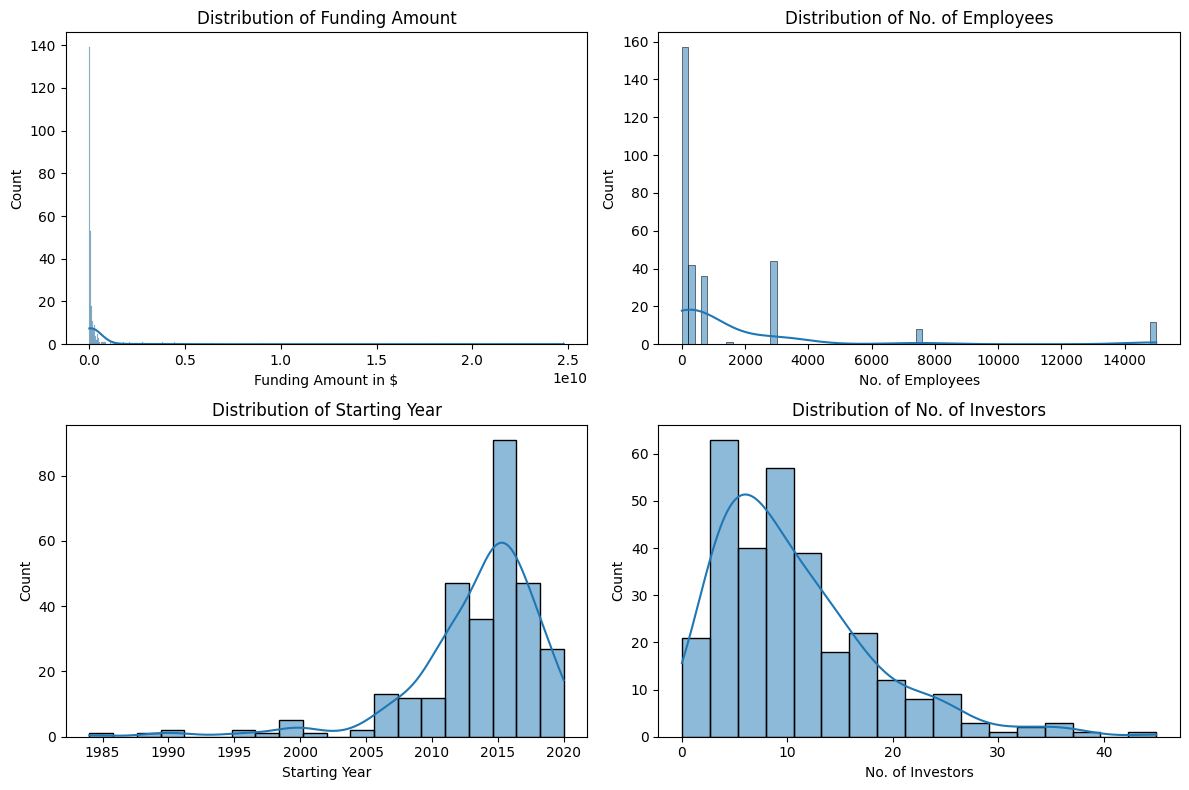

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting distributions
plt.figure(figsize=(12, 8))

# Funding Amount
plt.subplot(2, 2, 1)
sns.histplot(df['Funding Amount in $'], kde=True)
plt.title('Distribution of Funding Amount')

# No. of Employees
plt.subplot(2, 2, 2)
sns.histplot(df['No. of Employees'], kde=True)
plt.title('Distribution of No. of Employees')

# Starting Year
plt.subplot(2, 2, 3)
sns.histplot(df['Starting Year'], kde=True, bins=20)
plt.title('Distribution of Starting Year')

# No. of Investors
plt.subplot(2, 2, 4)
sns.histplot(df['No. of Investors'], kde=True)
plt.title('Distribution of No. of Investors')

plt.tight_layout()
plt.show()


1.Starting year is highly left skewed suggesting that dataset mostly contains newer startups.

2.Funding amount is right skewed with most startups receiving relativelt less funding amounts and a few outliers receiving significantly higher amounts.

3.The distribution of funding rounds is also right-skewed, with most startups going through fewer funding rounds (typically 3-5). A smaller number of startups have gone through more than 10 funding rounds.

4.Similar to the funding rounds, the number of investors is right-skewed. Most startups have fewer than 10 investors, but there are a few startups with a larger number of investors, indicating they might be well-established or have gone through multiple funding rounds.

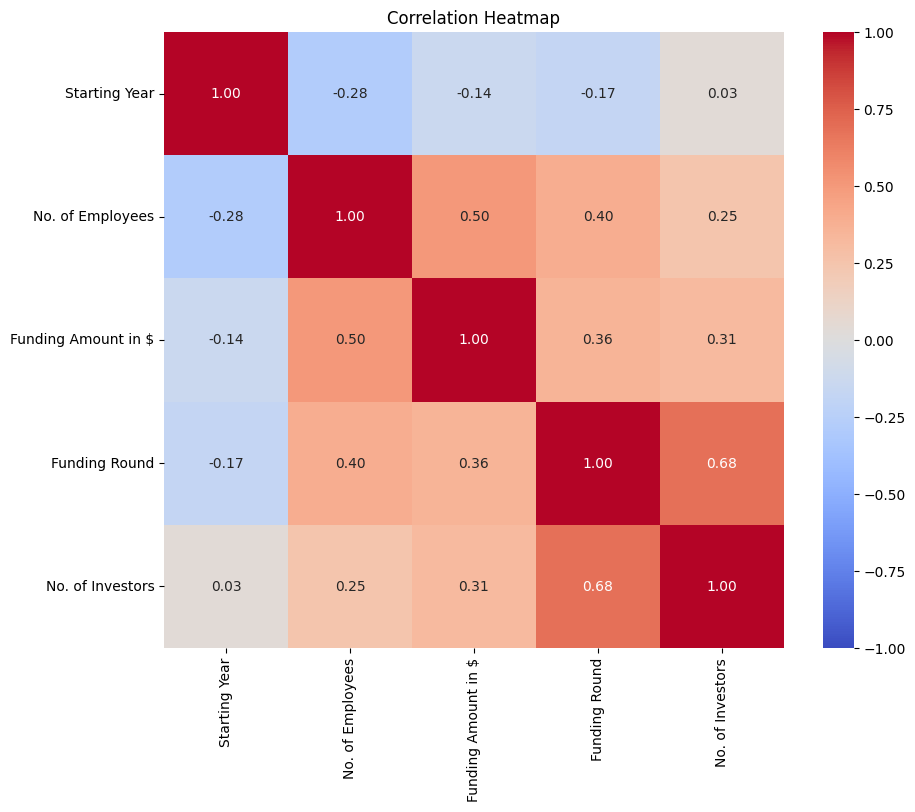

In [33]:
# Select only the numerical columns
numerical_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


1.Startup Maturity: The number of employees and funding amount are positively correlated, indicating that as a startup matures, it raises more capital and hires more staff.

2.Investor and Funding Rounds: More investors are associated with a higher number of funding rounds and more funding, suggesting that companies that are able to secure more investors can also go through more funding rounds and raise more money.

3.Starting Year Impact: Newer startups tend to have fewer employees and may be in earlier funding stages, which is consistent with the idea that they are still in the growth phase.

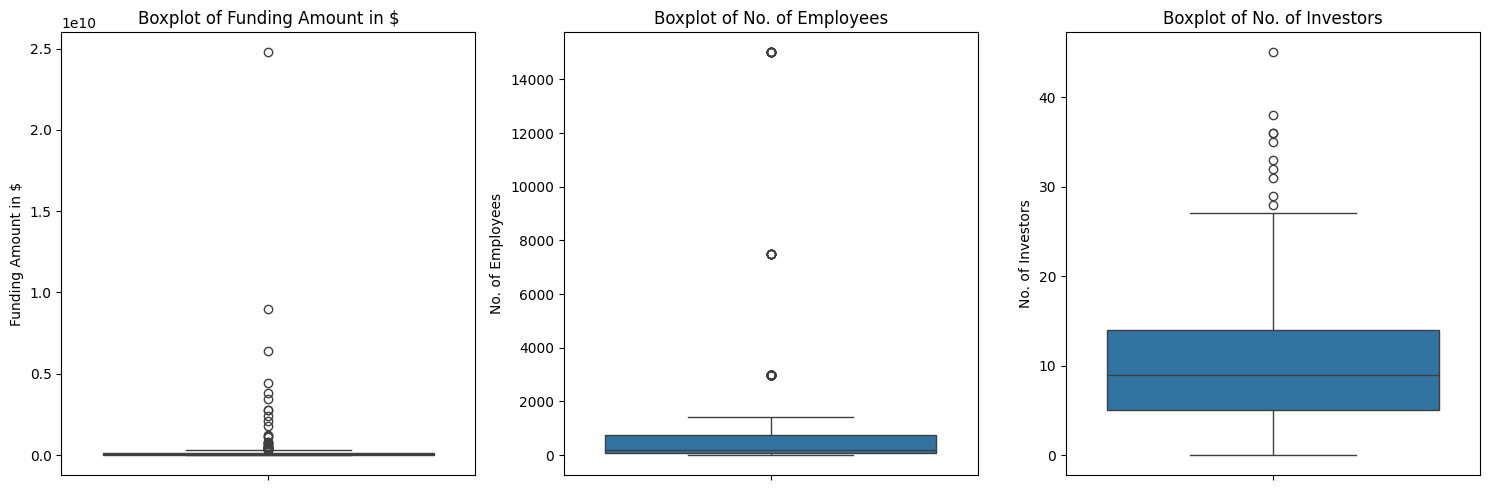

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns for which we want to check outliers
numerical_columns = ['Funding Amount in $', 'No. of Employees', 'No. of Investors']

# Plotting boxplots for each numerical column
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_columns):
    plt.subplot(1, len(numerical_columns), i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


Outliers are present 

In [35]:
from scipy.stats import zscore

# Calculate Z-scores for numerical columns
df['Funding Amount Z-Score'] = zscore(df['Funding Amount in $'])
df['No. of Employees Z-Score'] = zscore(df['No. of Employees'])
df['No. of Investors Z-Score'] = zscore(df['No. of Investors'])

# Define a threshold to identify outliers (commonly ±3)
threshold = 3

# Identify outliers based on Z-Score
outliers = df[(df['Funding Amount Z-Score'].abs() > threshold) |
              (df['No. of Employees Z-Score'].abs() > threshold) |
              (df['No. of Investors Z-Score'].abs() > threshold)]

# Display the outliers
print(f"Outliers Detected: {len(outliers)}")
print(outliers[['Funding Amount in $', 'No. of Employees', 'No. of Investors']])


Outliers Detected: 15
     Funding Amount in $  No. of Employees  No. of Investors
10             398500000             375.5                36
11            3808672049            7500.5                45
23            2745964432           15001.0                38
32           24767620475           15001.0                35
37            6419310306           15001.0                 8
41            9009184737           15001.0                24
46             277583000           15001.0                11
50             274145634             750.5                36
107           2100568357           15001.0                25
124            485392829           15001.0                 4
143           2428380000           15001.0                23
179            742000000           15001.0                 2
239           3439351106           15001.0                23
241            317695079           15001.0                 6
263             26500000           15001.0                 4


In order to handle outliers capping is carried out

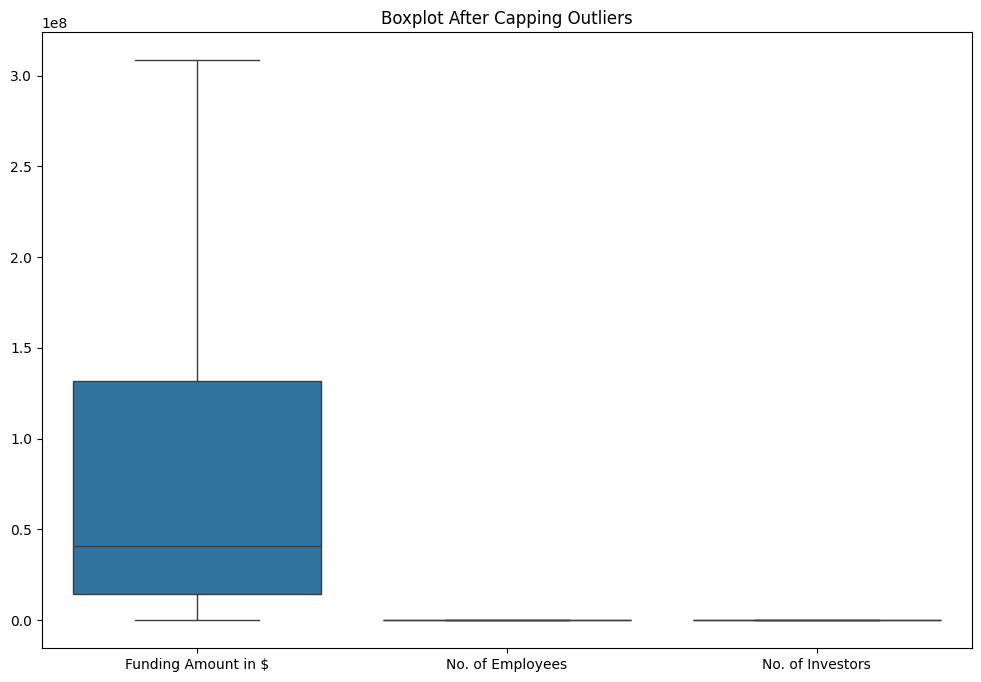

In [36]:
def cap_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column.clip(lower=lower_bound, upper=upper_bound)

# Apply capping
df['Funding Amount in $'] = cap_outliers(df['Funding Amount in $'])
df['No. of Employees'] = cap_outliers(df['No. of Employees'])
df['No. of Investors'] = cap_outliers(df['No. of Investors'])

# Re-check the distributions
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['Funding Amount in $', 'No. of Employees', 'No. of Investors']])
plt.title('Boxplot After Capping Outliers')
plt.show()


In [37]:
from scipy.stats import zscore

df['Funding Amount Z-Score'] = zscore(df['Funding Amount in $'])
outliers_z = df[(df['Funding Amount Z-Score'].abs() > 3)]
print(f"Detected Outliers using Z-Score: {len(outliers_z)}")


Detected Outliers using Z-Score: 0


In [38]:
# Example: Define a successful startup based on a funding threshold
funding_threshold = 1e6  # Example threshold in dollars
df['Success'] = np.where(df['Funding Amount in $'] > funding_threshold, 1, 0)


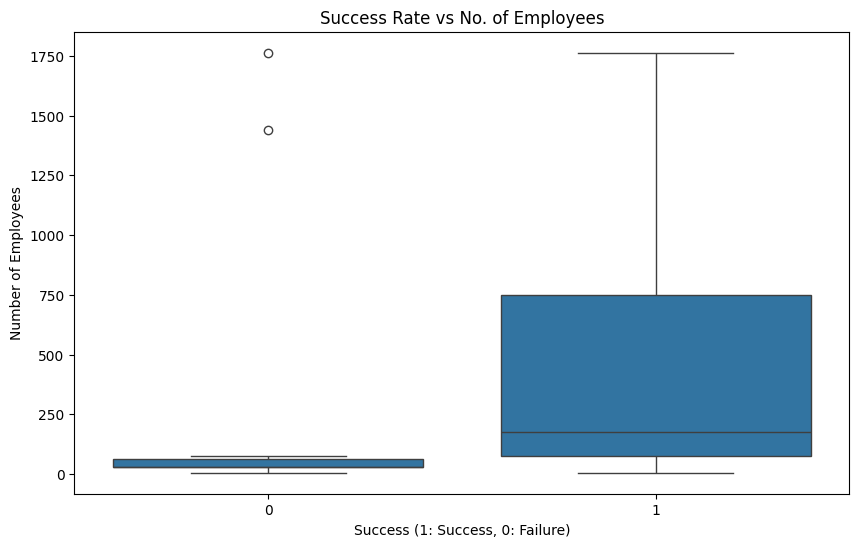

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting success rate against the number of employees
plt.figure(figsize=(10, 6))
sns.boxplot(x='Success', y='No. of Employees', data=df)
plt.title('Success Rate vs No. of Employees')
plt.xlabel('Success (1: Success, 0: Failure)')
plt.ylabel('Number of Employees')
plt.show()




Startups with more employees are generally more successful. Outliers exist, but higher employee counts are strongly associated with success, while low employee counts are more common in failed startups.

FEATURE ENGINEERING

In [40]:
# Create new features
df['Age'] = 2024 - df['Starting Year']  # Current year minus starting year
df['Funding per Employee'] = df['Funding Amount in $'] / df['No. of Employees']


In [41]:
# Check the data types of each column
print(df.dtypes)


Company                      object
City                         object
Starting Year                 int64
Founders                     object
Industries                   object
Description                  object
No. of Employees            float64
Funding Amount in $         float64
Funding Round                 int64
No. of Investors            float64
Funding Amount Z-Score      float64
No. of Employees Z-Score    float64
No. of Investors Z-Score    float64
Success                       int32
Age                           int64
Funding per Employee        float64
dtype: object


MODEL TRAINING AND EVALUATING MODEL

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Identify categorical columns
categorical_columns = ['Company', 'City', 'Founders', 'Industries']  # Adjust based on your dataset

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Select features and target variable
X = df_encoded.drop(['Success'], axis=1)  # Features
y = df_encoded['Success']  # Target variable

# Check for any non-numeric columns
non_numeric_columns = X.select_dtypes(include=[object]).columns.tolist()
print("Non-numeric columns:", non_numeric_columns)

# If any non-numeric columns are found, drop them
if non_numeric_columns:
    X.drop(columns=non_numeric_columns, inplace=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Non-numeric columns: ['Description']
Accuracy: 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.97      1.00      0.98        57

    accuracy                           0.97        60
   macro avg       0.98      0.67      0.74        60
weighted avg       0.97      0.97      0.96        60



In [43]:
# ! pip install imbalanced-learn


SMOTE is used to handle imbalance of the data

In [44]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize and train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9666666666666667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.97      1.00      0.98        57

    accuracy                           0.97        60
   macro avg       0.98      0.67      0.74        60
weighted avg       0.97      0.97      0.96        60



Top 10 most important features in the startup 

In [67]:
# Extract feature importance from the Random Forest model
importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print(feature_importance_df.head(10))


                                          Feature  Importance
5                          Funding Amount Z-Score    0.162940
2                             Funding Amount in $    0.117637
3                                   Funding Round    0.113872
9                            Funding per Employee    0.090722
8                                             Age    0.051919
7                        No. of Investors Z-Score    0.041367
4                                No. of Investors    0.032667
563                        Founders_Not Available    0.032137
0                                   Starting Year    0.028575
68   Company_Digital Class E-Learning Marketplace    0.023552


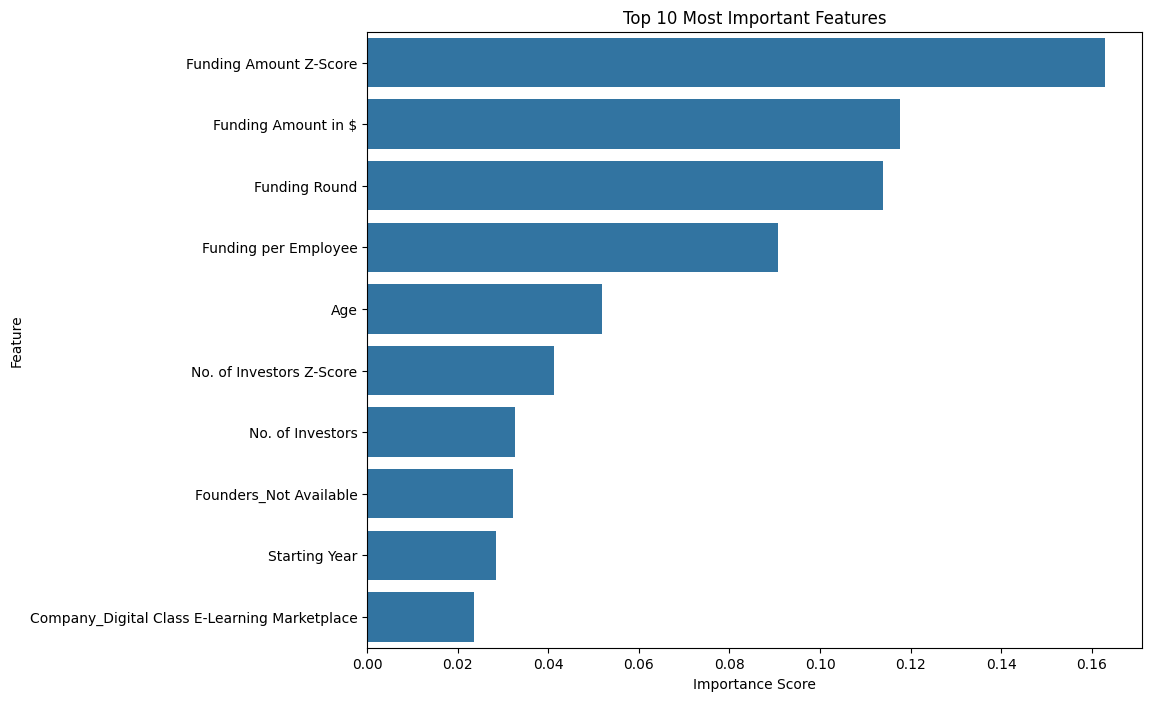

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


Funding Amount Z-Score and Funding Amount in $: These are the most important factors, showing that the amount of funding a startup receives is critical to its success.

Funding Round: The number of funding rounds also plays a significant role, indicating that startups going through multiple rounds of funding may have a higher chance of success.

Funding per Employee: This feature suggests that efficient use of funding (i.e., more funding per employee) is also a key indicator of success.

The top 10 most important features influencing startup success include funding-related metrics such as Funding Amount Z-Score and Funding Amount in $, indicating that higher funding levels are crucial for success. Funding Round and Funding per Employee are also significant, reflecting the importance of securing multiple rounds of investment and efficient use of resources. Company age and the number of investors also play notable roles, while specific company characteristics like the presence of founders and industry type are less influential.